In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm


In [2]:
df = pd.read_csv('../data/cl_papers.csv', index_col=0)
df

,id,title,area,source,year,doi,abstract,semantic_scholar_id
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb
...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c


In [13]:
def is_interpretability(row):
    if row['year'] < 2020:
        # interpretability and analysis track started in 2020
        return None

    area = row['area'].lower()
    if 'interpretability' in area or 'analysis of language models' in area:
        return True
    
    return False

df['interpretability'] = df.apply(is_interpretability, axis=1)

In [14]:
df_with_interpretability = df[(df['interpretability'] == True) | (df['interpretability'] == False)]
df_with_interpretability

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c,Question Answering,False
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19,Dialogue,False
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16,Dialogue,False
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008,None,False
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb,Information Extraction,False
...,...,...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479,None,False
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8,None,False
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92,None,False
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c,Semantics,False


# Computing embeddings

In [15]:
from transformers import AutoTokenizer
from adapters import AutoAdapterModel
from tqdm import tqdm
tqdm.pandas()

tokenizer = AutoTokenizer.from_pretrained('allenai/specter2_base')

model = AutoAdapterModel.from_pretrained("allenai/specter2_base")
adapter_name = model.load_adapter("allenai/specter2_classification", source="hf", set_active=True)

def get_embedding(paper_row):
    text = paper_row['title'] + tokenizer.sep_token + paper_row['abstract']
    inputs = tokenizer(text,
                       padding=True,
                       truncation=True,
                       return_tensors="pt",
                       return_token_type_ids=False,
                       max_length=2048)
    output = model(**inputs)
    embeddings = output.last_hidden_state[:, 0, :][0].detach().numpy()
    return embeddings

df_with_interpretability['embedding'] = df_with_interpretability.progress_apply(get_embedding, axis=1)

/Users/tom/miniconda3/envs/interpretability-impact/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/tom/miniconda3/envs/interpretability-impact/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/tom/miniconda3/envs/interpretability-impact/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6994/6994 [14:11<00:00,  8.21it/s]
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/1970831043.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_interpretability['embedding'] = df_with_interpretability.progress_apply(get_embedding, axis=1)


In [23]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch

SEED = 42
SPLIT = 0.2

X = np.stack(df_with_interpretability['embedding'].values)

y = df_with_interpretability['interpretability'].values
y = torch.tensor([1 if label else 0 for label in y], dtype=torch.long)

indices = np.arange(len(df_with_interpretability))
train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

df_train, df_test = df_with_interpretability.iloc[train_indices], df_with_interpretability.iloc[test_indices]

In [24]:
df_train[df_train['interpretability'] == True]

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability,embedding
1919,NaN,FastIF: Scalable Influence Functions for Effic...,Interpretability and Analysis of Models for NLP,EMNLP,2021,10.18653/v1/2021.emnlp-main.808,Influence functions approximate the “influence...,18fb344c9bfd019014996e57c465aa279b7e0151,Interpretability and Analysis,True,"[-1.1471611, -1.6139609, -0.5785974, -0.756649..."
2522,NaN,What Context Features Can Transformer Language...,Interpretability and Analysis of Models for NLP,ACL,2021,10.18653/v1/2021.acl-long.70,Transformer-based language models benefit from...,e1bc348fd7da000da6585e82994ecfedcecb5a4c,Interpretability and Analysis,True,"[-0.372904, 0.28571808, 0.10002303, -1.258752,..."
3274,2256,Language Model Pre-Training with Sparse Latent...,Language Modeling and Analysis of Language Models,EMNLP,2022,10.18653/v1/2022.emnlp-main.96,Modern large-scale Pre-trained Language Models...,cd16a961b16482d4aede6227acaa95183c5c555c,Interpretability and Analysis,True,"[-0.48547608, -0.14370383, -0.3476556, -1.3883..."
1897,NaN,Debiasing Methods in Natural Language Understa...,Interpretability and Analysis of Models for NLP,EMNLP,2021,10.18653/v1/2021.emnlp-main.116,Model robustness to bias is often determined b...,10bc2ba3533bca85b75cb09dcc100809fc3221ea,Interpretability and Analysis,True,"[-0.31337154, 0.22950839, -0.51730245, -1.2140..."
8911,P4975,Contrastive Error Attribution for Finetuned La...,Interpretability and Analysis of Models for NLP,ACL,2023,10.18653/v1/2023.acl-long.643,Recent work has identified noisy and misannota...,6d763d3107bed2ce5ab4a79f1857f47a2e269a41,Interpretability and Analysis,True,"[-0.18097351, 0.13648665, -0.0045430805, -0.94..."
...,...,...,...,...,...,...,...,...,...,...,...
1021,main.311,Roles and Utilization of Attention Heads in Tr...,Interpretability and Analysis of Models for NLP,ACL,2020,10.18653/v1/2020.acl-main.311,Sentence encoders based on the transformer arc...,5b6d03ed66473599ee31872b3cd5ad2ce282371f,Interpretability and Analysis,True,"[-0.10598257, -0.115934625, 0.034281507, -1.54..."
3943,4397,Finding Skill Neurons in Pre-trained Transform...,Language Modeling and Analysis of Language Models,EMNLP,2022,10.18653/v1/2022.emnlp-main.765,Transformer-based pre-trained language models ...,5d3cf0909ba206cd6bc2e86610f77ca25d9b2d1c,Interpretability and Analysis,True,"[0.03446908, -0.49458146, -0.21544456, -1.3379..."
1899,NaN,What’s Hidden in a One-layer Randomly Weighted...,Interpretability and Analysis of Models for NLP,EMNLP,2021,10.18653/v1/2021.emnlp-main.231,"We demonstrate that, hidden within one-layer r...",cebd54ea966172111d08b4f215a73fe84350562e,Interpretability and Analysis,True,"[0.10138122, 0.17559952, -0.0989433, -0.837517..."
4843,518,ViSoBERT: A Pre-Trained Language Model for Vie...,Language Modeling and Analysis of Language Models,EMNLP,2023,10.18653/v1/2023.emnlp-main.315,"English and Chinese, known as resource-rich la...",b44fbb613573f78d444361d7670c8ab130ef9174,Interpretability and Analysis,True,"[-0.9606421, 0.12455705, -0.17797853, -1.30559..."


In [25]:
df[df['semantic_scholar_id'] == '7c23ce3547ae837ff633b14e457a93de6d270b37']

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability,embedding
8196,P1299,What Are You Token About? Dense Retrieval as D...,Information Retrieval and Text Mining,ACL,2023,10.18653/v1/2023.acl-long.140,Dual encoders are now the dominant architectur...,7c23ce3547ae837ff633b14e457a93de6d270b37,None,False,"[-1.2692322, -0.4787535, -0.47741634, -1.13703..."


In [26]:
df_train[df_train['semantic_scholar_id'] == '7c23ce3547ae837ff633b14e457a93de6d270b37']

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability,embedding
8196,P1299,What Are You Token About? Dense Retrieval as D...,Information Retrieval and Text Mining,ACL,2023,10.18653/v1/2023.acl-long.140,Dual encoders are now the dominant architectur...,7c23ce3547ae837ff633b14e457a93de6d270b37,None,False,"[-1.2692322, -0.4787535, -0.47741634, -1.13703..."


In [27]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


# we are augmenting the test data with blackboxnlp papers
blackbox_df = pd.read_csv('../data/blackbox_papers.csv', index_col=0)

X_blackbox = np.stack(blackbox_df['embedding'].values) 
X_blackbox = torch.stack([torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32) for x in X_blackbox])
y_blackbox = blackbox_df['interpretability'].values
y_blackbox = torch.tensor([1 if label else 0 for label in y_blackbox], dtype=torch.long)
X_augmented_train = torch.cat((X_train, X_blackbox), dim=0)
y_augmented_train = torch.cat((y_train, y_blackbox), dim=0)


/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/2530799469.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/2530799469.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim


class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.softmax(out, dim=-1)
        return out


In [29]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 150
LR = 0.002
INPUT_SIZE = X_train.shape[1]

In [30]:
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import torch

train_dataset = TensorDataset(X_augmented_train, y_augmented_train)

class_sample_count = np.array([len(np.where(y_augmented_train == t)[0]) for t in np.unique(y_augmented_train)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_augmented_train])

samples_weight = torch.from_numpy(samples_weight)
samples_weight = samples_weight.double()
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.14it/s]


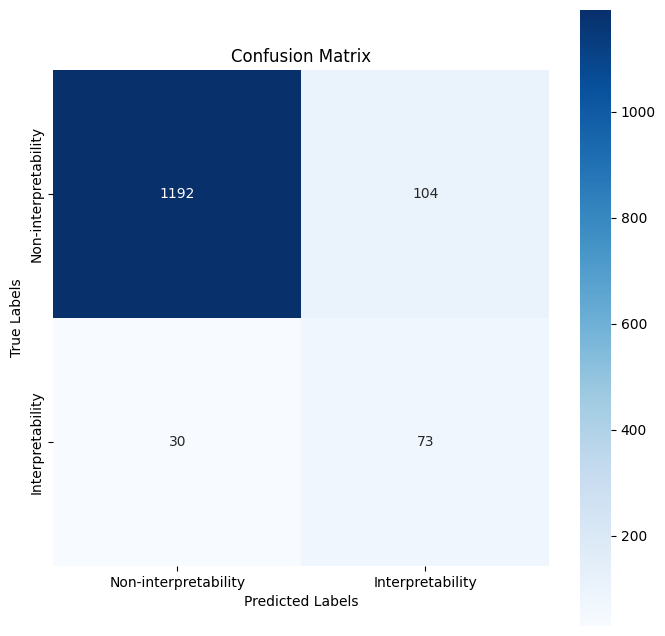

F1 Score: 0.5214285714285715


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
EPOCHS = 50

for epoch in tqdm(range(EPOCHS)):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-interpretability', 'Interpretability']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", score)

In [117]:
KEYWORDS = ['interpretability', 'interpretable', 'dimension', 'subspace', 'inner workings', 'circuit', 'probe', 'probing', 'counterfactual', 'attribution', 'subnetwork', 'intrinsic', 'explanation', 'factual', 'causal', 'role of ', 'why', 'encode', 'underlying', 'explainable', 'shortcut', 'encodings', 'adversarial', 'features', 'align', 'insight']
# Removed keywords (too many false positives): adversarial, representation, analysis, interpret, projection, interpretation, understand, space, mechanism, structure, understanding

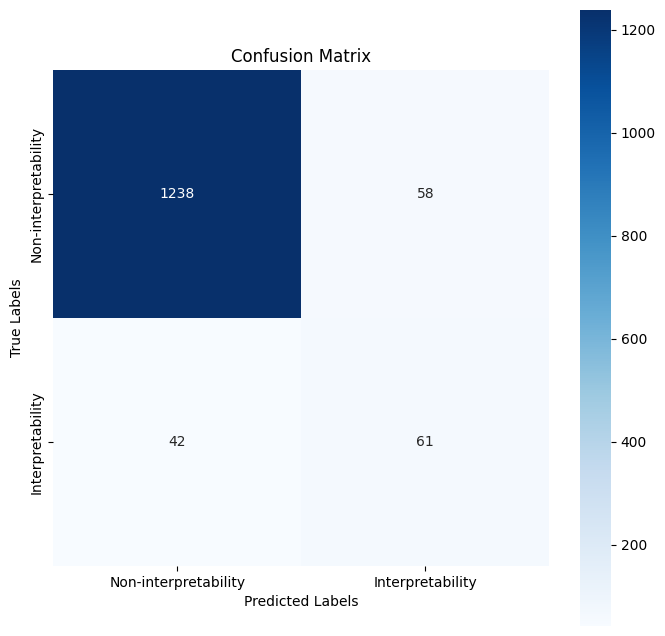

F1 Score: 0.5495495495495496


In [118]:
from sklearn.metrics import f1_score

y_pred = []
y_true = []


model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        vector = row['embedding']
        output = model(torch.tensor(vector))
        pred = torch.argmax(output)
        pred = int(output[1] > 0.5)
        
        has_keyword = any([word in row['abstract'].lower() for word in KEYWORDS])

        y_pred.append(pred and has_keyword)
        y_true.append(row['interpretability'])
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-interpretability', 'Interpretability']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", score)

In [116]:
model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        vector = row['embedding']
        output = model(torch.tensor(vector))
        pred = torch.argmax(output)
        has_keyword = any([word in row['abstract'].lower() for word in KEYWORDS])

        
        if not (pred and has_keyword) and row['interpretability'] and pred:
            print(row['abstract'])
            print('keyword', has_keyword)
            print('pred', output[1])
            print('-' * 50)


Language Models (LMs) pre-trained with self-supervision on large text corpora have become the default starting point for developing models for various NLP tasks. Once the pre-training corpus has been assembled, all data samples in the corpus are treated with equal importance during LM pre-training. However, due to varying levels of relevance and quality of data, equal importance to all the data samples may not be the optimal choice. While data reweighting has been explored in the context of task-specific supervised learning and LM fine-tuning, model-driven reweighting for pre-training data has not been explored. We fill this important gap and propose PRESENCE, a method for jointly reweighting samples by leveraging self-influence (SI) scores as an indicator of sample importance and pre-training. PRESENCE promotes novelty and stability for model pre-training. Through extensive analysis spanning multiple model sizes, datasets, and tasks, we present PRESENCE as an important first step in t

In [119]:
torch.save(model.state_dict(), './classifier-weights.pt')

# Machine Translation Classifier

In [123]:
def is_machine_translation(row):
    area = row['area'].lower()
    if 'translation' in area:
        return True
    
    return False

df['mt'] = df.apply(is_machine_translation, axis=1)

In [19]:
df['embedding'] = df.progress_apply(get_embedding, axis=1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9255/9255 [19:26<00:00,  7.94it/s]


In [133]:
SEED = 42
SPLIT = 0.2

X = np.stack(df['embedding'].values)

y = df['mt'].values
y = torch.tensor([1 if label else 0 for label in y], dtype=torch.long)

indices = np.arange(len(df))
train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

df_train, df_test = df.iloc[train_indices], df.iloc[test_indices]

In [134]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_66219/2947476391.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_66219/2947476391.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


In [135]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 150
LR = 0.002
INPUT_SIZE = X_train.shape[1]

In [136]:
train_dataset = TensorDataset(X_train, y_train)

class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_train])

samples_weight = torch.from_numpy(samples_weight)
samples_weight = samples_weight.double()
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.57it/s]


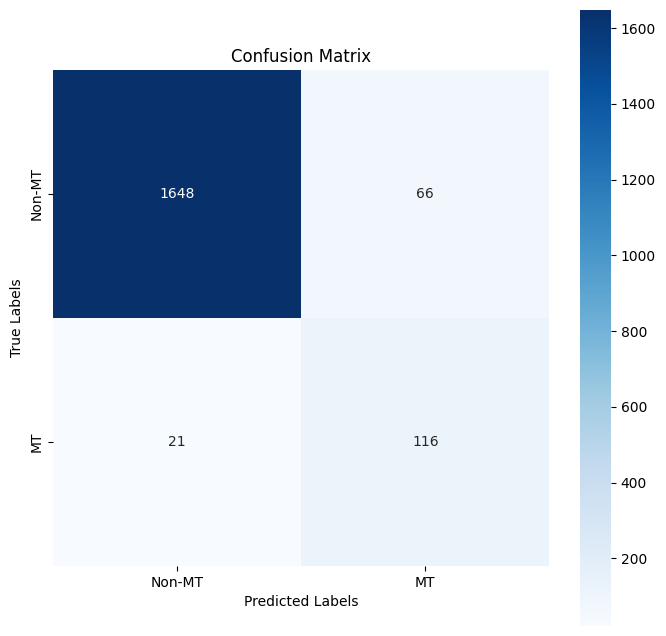

F1 Score: 0.7272727272727273


In [137]:
model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
EPOCHS = 50

for epoch in tqdm(range(EPOCHS)):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-MT', 'MT']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", score)

In [138]:
torch.save(model.state_dict(), './mt-classifier-weights.pt')

# Train multiple classifiers

In [3]:
raw_tracks = list(set(df['area']))

In [4]:
analysis_or_interpretability_tracks = list(filter(lambda x: 'interpretability' in x.lower() or 'analysis of language models' in x.lower(), raw_tracks))
print('interp & analysis tracks')
print(analysis_or_interpretability_tracks)
print()

syntax_tracks = list(filter(lambda x: 'syntax' in x.lower(), raw_tracks))
print('syntax tracks')
print(syntax_tracks)
print()

mt_tracks = list(filter(lambda x: 'translation' in x.lower(), raw_tracks))
print('MT tracks')
print(mt_tracks)
print()

grounding_tracks = list(filter(lambda x: 'grounding' in x.lower(), raw_tracks))
print('grounding tracks')
print(grounding_tracks)
print()

semantics_tracks = list(filter(lambda x: 'semantics' in x.lower(), raw_tracks))
print('semantics tracks')
print(semantics_tracks)
print()

evaluation_tracks = list(filter(lambda x: 'evaluation' in x.lower(), raw_tracks))
print('evaluation tracks')
print(evaluation_tracks)
print()

info_extraction_tracks = list(filter(lambda x: 'extraction' in x.lower() or 'retrieval' in x.lower(), raw_tracks))
print('info_extraction tracks')
print(info_extraction_tracks)
print()

qa_tracks = list(filter(lambda x: 'answering' in x.lower(), raw_tracks))
print('qa_tracks')
print(qa_tracks)
print()

dialogue_tracks = list(filter(lambda x: 'dialog' in x.lower(), raw_tracks))
print('dialogue_tracks')
print(dialogue_tracks)
print()

sentiment_analysis_tracks = list(filter(lambda x: 'sentiment analysis' in x.lower(), raw_tracks))
print('sentiment_analysis_tracks')
print(sentiment_analysis_tracks)
print()

applications_tracks = list(filter(lambda x: 'nlp applications' in x.lower(), raw_tracks))
print('applications_tracks')
print(applications_tracks)
print()

ml_tracks = list(filter(lambda x: 'machine learning' in x.lower(), raw_tracks))
print('ml_tracks')
print(ml_tracks)
print()

generation_tracks = list(filter(lambda x: 'generation' in x.lower(), raw_tracks))
print('generation_tracks')
print(generation_tracks)
print()

interp & analysis tracks
['Interpretability, Interactivity, and Analysis of Models for NLP', 'Interpretability and Analysis of Models for NLP', 'Interpretability, Interactivity and Analysis of Models for NLP', 'Language Modeling and Analysis of Language Models']

syntax tracks
['Area D (Morphology, Syntax, Chunking, Psycholinguistics) [LONG]', 'Syntax, Parsing, and Linguistic Theories', 'Tagging, Chunking, Syntax and Parsing', 'Syntax: Tagging, Chunking, and Parsing', 'Syntax, Parsing and their Applications', 'Syntax: Tagging, Chunking and Parsing', 'Machine Translation and Mulitilinguality, Phonology, Morphology and Word Segmentation, Tagging, Chunking, Syntax and Parsing', 'Dialog and Interactive Systems, Machine Translation and Multilinuality, Phonology, Morphology, and Word Segmentation, Speech, Vision, Robotics, Multimodal and Grounding, Tagging, Chunking, Syntax and Parsing']

MT tracks
['Machine Translation, Multilinguality', 'Area G (Machine Translation and Multilinguality) [LO

In [8]:
for track in raw_tracks:
    print(f"  '{track}': None,")

  'Dialog and Interactive Systems, Multilinguality': None,
  'Language/Document Model': None,
  'Text Mining and NLP Applications': None,
  'Ethic Concerns:Sentiment Analysis, Stylistic Analysis, and Argument Mining': None,
  'Word-level Semantics': None,
  'Dialog and Interactive Systems': None,
  'Ethic Concerns:Dialogue and Interactive Systems': None,
  'Area D (Morphology, Syntax, Chunking, Psycholinguistics) [LONG]': None,
  'Question Answering, Textual Inference and Other Areas of Semantics': None,
  'Vision, Multimodal, Grounding, Speech': None,
  'Syntax, Parsing, and Linguistic Theories': None,
  'Ethic Concerns:Unsupervised and Weakly-Supervised Methods in NLP': None,
  'Industry': None,
  'Multilinguality': None,
  'Efficient Methods for NLP': None,
  'Dialog and Interactive Systems, Speech, Vision, Robotics, Multimodal and Grounding': None,
  'Parsing': None,
  'Machine Translation, Multilinguality': None,
  'Ethic Concerns:Speech, Vision, Robotics, Multimodal Grounding': N

In [40]:
df[df['area'] == 'Unsupervised and Weakly-Supervised Methods in NLP']


,id,title,area,source,year,doi,abstract,semantic_scholar_id
3244,1416,Learning to Adapt to Low-Resource Paraphrase G...,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.66,Paraphrase generation is a longstanding NLP ta...,20d2d10b0a6fabdfb89735a23c519db5811504bc
3251,1635,Zero-Shot Text Classification with Self-Training,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.73,Recent advances in large pretrained language m...,82cf46b592f499a2957a70a53947b2bbd5ca7cce
3263,1945,Fine-grained Category Discovery under Coarse-g...,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.85,Novel category discovery aims at adapting mode...,d078a0fb395c4c964123790873c8c748a2a73463
3283,2490,Learning Instructions with Unlabeled Data for ...,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.105,Training language models to learn from human i...,82cd40e926300b6b18c34ced2edeb07e84d9d6c7
3342,4439,Bilingual Lexicon Induction for Low-Resource L...,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.164,Bilingual lexicons form a critical component o...,0d1bceb56cfb765b46886ee83f1d6a498d6ea61a
3359,149,Fast-R2D2: A Pretrained Recursive Neural Netwo...,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.181,Chart-based models have shown great potential ...,dc85180153687539724d20a5927b2fbdf5f8e2a4
3417,582,Unsupervised Tokenization Learning,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.239,"In the presented study, we discover that the s...",60eae587d084b4bc3bb7ae31d5e84a97e9dff15d
3491,1066,FastClass: A Time-Efficient Approach to Weakly...,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.313,Weakly-supervised text classification aims to ...,b7d37760e1d6894bcab1a4b3054df9119fe1d556
3509,1208,PASTA: Table-Operations Aware Fact Verificatio...,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.331,Fact verification has attracted a lot of atten...,5fefc28ae503c465b1801da2b457f5a2cb5bd51f
3544,1449,Rethinking Style Transformer with Energy-based...,Unsupervised and Weakly-Supervised Methods in NLP,EMNLP,2022,10.18653/v1/2022.emnlp-main.366,"Style control, content preservation, and fluen...",21afd67b684d15ff56905c03d57497691b56c3ba


In [41]:
mapping = {
  'Cognitive Modeling and Psycholinguistics': 'Linguistic Theories and Psycholinguistics',
  'Commonsense Reasoning': 'Commonsense Reasoning',
  'Computational Social Science and Cultural Analytics': 'Social Science',
  'Computational Social Science and Social Media': 'Social Science',
  'Dialog and Interactive Systems': 'Dialogue',
  'Dialogue and Interactive Systems': 'Dialogue',
  'Discourse and Pragmatics': 'Discourse and Pragmatics',
  'Discourse and Pragmatics & Ethics in NLP': 'Discourse and Pragmatics',
  'Efficient Methods for NLP': 'Efficient Methods',
  'Ethic Concerns:Dialogue and Interactive Systems': 'Ethics',
  'Ethic Concerns:Ethics': 'Ethics',
  'Ethic Concerns:Linguistic Theories, Cognitive Modeling and Psycholinguistics': 'Ethics',
  'Ethic Concerns:Multilinguality': 'Ethics',
  'Ethic Concerns:NLP Applications': 'Ethics',
  'Ethic Concerns:Resources and Evaluation': 'Ethics',
  'Ethic Concerns:Sentiment Analysis, Stylistic Analysis, and Argument Mining': 'Ethics',
  'Ethic Concerns:Speech, Vision, Robotics, Multimodal Grounding': 'Ethics',
  'Ethic Concerns:Unsupervised and Weakly-Supervised Methods in NLP': 'Ethics',
  'Ethics': 'Ethics',
  'Ethics and NLP': 'Ethics',
  'Ethics in NLP': 'Ethics',
  'Generation': 'Generation',
  'Human-Centered NLP': 'Human-Centered NLP',
  'Industry': 'Industry',
  'Information Extraction': 'Information Extraction/Retrieval',
  'Information Retrieval and Text Mining': 'Information Extraction/Retrieval',
  'Interpretability and Analysis of Models for NLP': 'Interpretability and Analysis',
  'Interpretability, Interactivity and Analysis of Models for NLP': 'Interpretability and Analysis',
  'Interpretability, Interactivity, and Analysis of Models for NLP': 'Interpretability and Analysis',
  'Language Generation': 'Generation',
  'Language Grounding to Vision, Robotics and Beyond': 'Multimodality, Speech and Grounding',
  'Language Grounding to Vision, Robotics, and Beyond': 'Multimodality, Speech and Grounding',
  'Language Groundings, Speech and Multimodality': 'Multimodality, Speech and Grounding',
  'Language Modeling and Analysis of Language Models': 'Interpretability and Analysis',
  'Large Language Models': 'Large Language Models',
  'Linguistic Diversity': 'Machine Translation and Multilinguality',
  'Linguistic Theories, Cognitive Modeling and Psycholinguistics': 'Linguistic Theories and Psycholinguistics',
  'Linguistic Theories, Cognitive Modeling, and Psycholinguistics': 'Linguistic Theories and Psycholinguistics',
  'Machine Learning for NLP': 'Machine Learning',
  'Machine Translation': 'Machine Translation and Multilinguality',
  'Machine Translation and Multilinguality': 'Machine Translation and Multilinguality',
  'Multidisciplinary and Area Chair COI': 'Theme',
  'Multilingualism and Cross-Lingual NLP': 'Machine Translation and Multilinguality',
  'Multilinguality': 'Machine Translation and Multilinguality',
  'Multilinguality and Linguistic Diversity': 'Machine Translation and Multilinguality',
  'NLP Applications': 'Applications',
  'Natural Language Generation': 'Generation',
  'Phonology, Morphology and Word Segmentation': 'Phonology, Morphology and Word Segmentation',
  'Phonology, Morphology, and Word Segmentation': 'Phonology, Morphology and Word Segmentation',
  'Question Answering': 'Question Answering',
  'Resources and Evaluation': 'Resources and Evaluation',
  'Semantics': 'Semantics',
  'Semantics: Lexical': 'Semantics',
  'Semantics: Lexical Semantics': 'Semantics',
  'Semantics: Lexical, Sentence level, Document Level, Textual Inference, etc.': 'Semantics',
  'Semantics: Lexical, Sentence level, Textual Inference and Other areas': 'Semantics',
  'Semantics: Sentence Level': 'Semantics',
  'Semantics: Sentence-level Semantics, Textual Inference and Other areas': 'Semantics',
  'Semantics: Sentence-level Semantics, Textual Inference, and Other Areas': 'Semantics',
  'Semantics: Textual Inference and Other Areas of Semantics': 'Semantics',
  'Sentiment Analysis, Stylistic Analysis, and Argument Mining': 'Sentiment Analysis',
  'Special Theme on Language Diversity: From Low Resource to Endangered': 'Theme',
  'Speech and Multimodality': 'Multimodality, Speech and Grounding',
  'Speech, Vision, Robotics, Multimodal Grounding': 'Multimodality, Speech and Grounding',
  'Summarization': 'Summarization',
  'Syntax, Parsing and their Applications': 'Syntax',
  'Syntax: Tagging, Chunking and Parsing': 'Syntax',
  'Syntax: Tagging, Chunking, and Parsing': 'Syntax',
  'Theme': 'Theme',
  'Theme Track': 'Theme',
  'Theme Track: Large Language Models and the Future of NLP': 'Theme',
  'Theme: Reality Check': 'Theme',
  'Theory and Formalism in NLP (Linguistic and Mathematical)': 'Theory and Formalism in NLP',
  'Unsupervised and Weakly-Supervised Methods in NLP': 'Unsupervised and Weakly-Supervised Methods in NLP',
}

In [42]:
df_2020 = df[df['year'] >= 2020].copy()
df_2020['track'] = df_2020['area'].map(mapping)
df_2020

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c,Question Answering
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19,Dialogue
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16,Dialogue
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008,Applications
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb,Information Extraction/Retrieval
...,...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479,Machine Learning
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8,Linguistic Theories and Psycholinguistics
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92,Discourse and Pragmatics
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c,Semantics


In [49]:
df_2020['track'].value_counts(dropna=False)

track
Information Extraction/Retrieval                     674
Machine Translation and Multilinguality              594
Machine Learning                                     557
Applications                                         516
Dialogue                                             487
Interpretability and Analysis                        477
Semantics                                            456
Resources and Evaluation                             423
Multimodality, Speech and Grounding                  389
Generation                                           361
Question Answering                                   334
Sentiment Analysis                                   258
Summarization                                        244
Theme                                                188
Social Science                                       178
Ethics                                               130
Syntax                                               121
Efficient Methods        

In [54]:
dropped_tracks = [
    'Theme',
    'Discourse and Pragmatics',
    'Large Language Models',
    'Industry',
    'Phonology, Morphology and Word Segmentation',
    'Commonsense Reasoning',
    'Human-Centered NLP',
    'Unsupervised and Weakly-Supervised Methods in NLP',
    'Theory and Formalism in NLP',
    'Efficient Methods',
    'Linguistic Theories and Psycholinguistics'
]

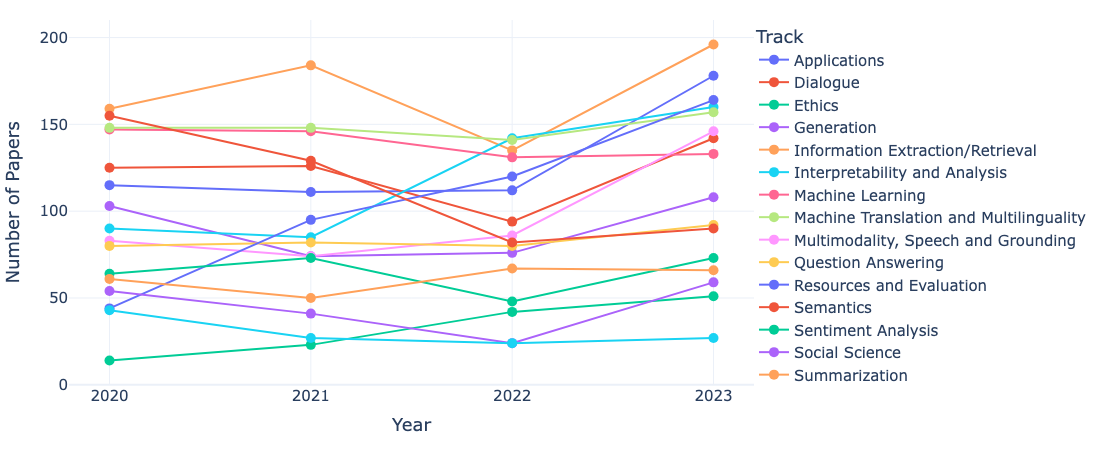

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import os
import json
import zipfile
import networkx as nx
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.figure_factory as ff

from tqdm import tqdm
from matplotlib import rc
from matplotlib import colormaps
from collections import defaultdict
count_data = df_2020.groupby('year')['track'].value_counts().unstack().fillna(0)
tracks = count_data.columns
fig = go.Figure()

for track in tracks:
    if track not in dropped_tracks:
        fig.add_trace(go.Scatter(
            x=count_data.index, 
            y=count_data[track], 
            mode='lines+markers',
            name=track,
            line=dict(),
            marker=dict(size=10)
        ))


fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Papers',
    legend_title='Track',
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='rgba(0, 0, 0, 0.1)'
    ),
    xaxis=dict(tickmode='array', tickvals=count_data.index, type='category'),
    template='plotly_white',
    width=900,
    height=465,
    margin=dict(l=20, t=20),
    font=dict(size=15)
)

fig.show()


In [52]:
def raw_track_to_track(raw_track):
    if raw_track in analysis_or_interpretability_tracks:
        return 'Interpretability and Analysis'
    if raw_track in syntax_tracks:
        return 'Syntax'
    if raw_track in mt_tracks:
        return 'Machine Translation'
    if raw_track in grounding_tracks:
        return 'Grounding'
    if raw_track in semantics_tracks:
        return 'Semantics'
    if raw_track in evaluation_tracks:
        return 'Evaluation'
    if raw_track in info_extraction_tracks:
        return 'Information Extraction/Retrieval'
    if raw_track in qa_tracks:
        return 'Question Answering'
    if raw_track in dialogue_tracks:
        return 'Dialogue'
    if raw_track in sentiment_analysis_tracks:
        return 'Sentiment Analysis'
    if raw_track in applications_tracks:
        return 'Applications'
    if raw_track in ml_tracks:
        return 'Machine Learning'
    if raw_track in generation_tracks:
        return 'Generation'
    return None


df['track'] = df['area'].apply(raw_track_to_track)
df

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability,embedding
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c,Question Answering,False,"[-1.2518485, -0.29460606, -0.8107855, -1.58728..."
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19,Dialogue,False,"[-0.34181368, 0.09105819, -0.26983717, -1.2941..."
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16,Dialogue,False,"[-0.20205598, -0.7245281, -0.19245991, -1.6045..."
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008,Applications,False,"[-0.36777574, 0.07150269, 0.48848996, -1.47894..."
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb,Information Extraction/Retrieval,False,"[-1.421698, 0.30209422, -1.1904925, -0.6410312..."
...,...,...,...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479,Machine Learning,False,"[-1.1633431, -0.48102272, -0.47072205, -0.8523..."
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8,None,False,"[-0.29978943, 0.25522044, -0.17783917, -1.1191..."
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92,None,False,"[-1.1211108, 0.66199553, 0.17070705, -0.508560..."
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c,Semantics,False,"[-0.9160983, 0.17695944, 0.10626677, -0.275818..."


In [53]:
tracks_to_create_classifier = ['Syntax', 'Grounding', 'Semantics', 'Information Extraction', 'Question Answering', 'Dialogue', 'Evaluation', 'Sentiment Analysis', 'Applications', 'Machine Learning', 'Generation']

In [56]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 150
LR = 0.002
INPUT_SIZE = 768
SEED = 42
SPLIT = 0.2



/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/1353456462.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/1353456462.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.45it/s]


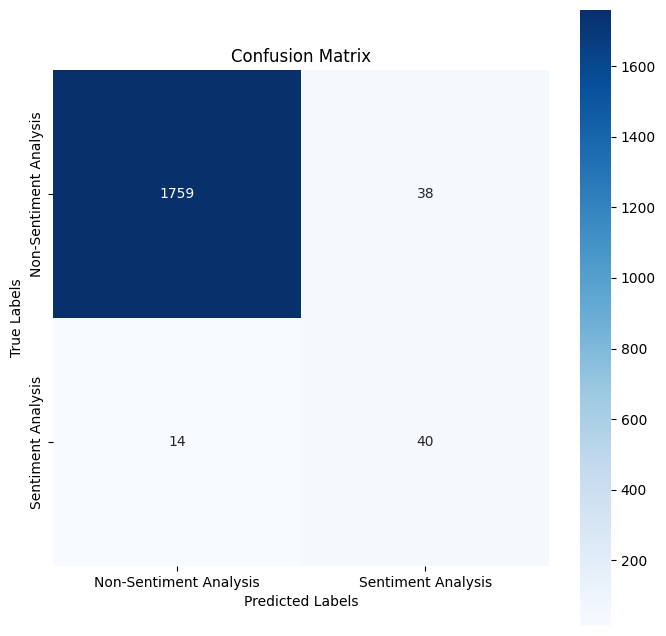

F1 Score: 0.6060606060606061


MLPClassifier(
  (fc1): Linear(in_features=768, out_features=400, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=400, out_features=2, bias=True)
)

In [65]:
from sklearn.metrics import f1_score

def train_classifier(track):
    X = np.stack(df['embedding'].values)

    y = df['track'].values
    y = torch.tensor([1 if label == track else 0 for label in y], dtype=torch.long)
    
    indices = np.arange(len(df))
    train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    df_train, df_test = df.iloc[train_indices], df.iloc[test_indices]
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    y_test = torch.tensor(y_test, dtype=torch.long)

    train_dataset = TensorDataset(X_train, y_train)
    
    class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
    weight = 1. / class_sample_count
    samples_weight = np.array([weight[t] for t in y_train])
    
    samples_weight = torch.from_numpy(samples_weight)
    samples_weight = samples_weight.double()
    sampler = WeightedRandomSampler(samples_weight, len(samples_weight))
    
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
    
    test_dataset = TensorDataset(X_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, 2)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
    EPOCHS = 50
    
    for epoch in tqdm(range(EPOCHS)):
        model.train()
        for i, (inputs, labels) in enumerate(train_loader):
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        scheduler.step()
        
    y_pred = []
    y_true = []
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.float(), labels.float()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())
    
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
    labels = ['Non-' + track, track]
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title('Confusion Matrix')
    plt.show()
    score = f1_score(y_true, y_pred, average='binary')
    print("F1 Score:", score)
    return model

train_classifier('Sentiment Analysis')

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/286480518.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/286480518.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.26it/s]


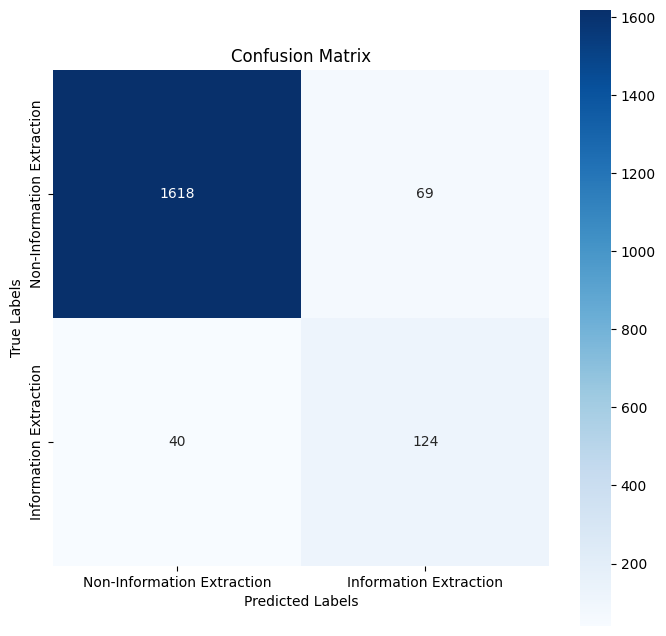

F1 Score: 0.6946778711484594


In [39]:
good_classifiers_tracks = ['Information Extraction', 'Dialogue']

model = train_classifier('Information Extraction')
torch.save(model.state_dict(), './info-extraction-classifier-weights.pt')

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/3839837987.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/3839837987.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.40it/s]


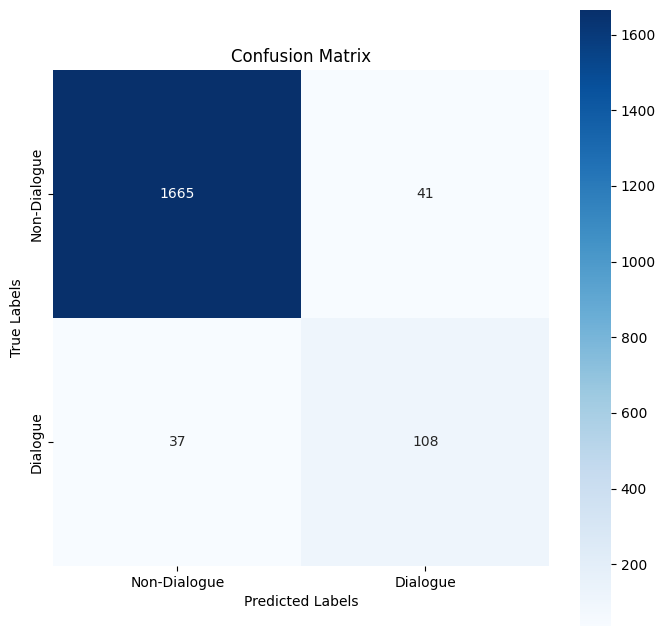

F1 Score: 0.7346938775510204


In [62]:
model = train_classifier('Dialogue')
torch.save(model.state_dict(), './dialogue-classifier-weights.pt')

In [64]:
len(df[pd.isna(df['track'])]) / len(df)

0.20875202593192868